In [1]:
# pip install transformers


In [2]:
import requests
from PIL import Image
import os
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model_name = "microsoft/trocr-base-handwritten"
processor = TrOCRProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


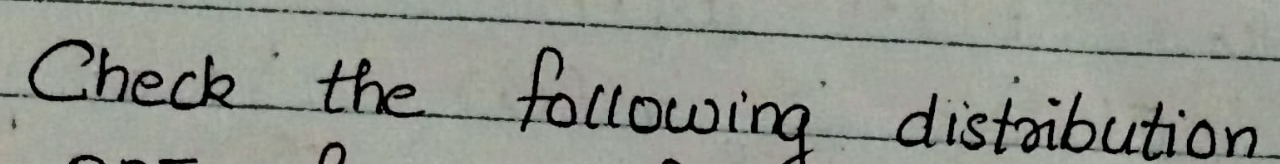

In [26]:
test_image = './train_v2/train2/TRAIN_004.jpg'
image=Image.open(test_image).convert('RGB')
image

In [27]:
inputs=processor(image, return_tensors='pt').pixel_values
generated_ids=model.generate(inputs)
generated_text=processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

Check the following distribution


In [6]:
root_dir='./test_v2/test2/'
image_paths=os.listdir(root_dir)[:250]
len(image_paths)
# print(image_paths)

10

In [7]:
images=np.array(image_paths)

In [21]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 3, figsize=(10, 10))
    np.random.shuffle(df)
    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            img_path = df[i]
            image = Image.open(root_dir + img_path).convert('RGB')
            inputs = processor(image, return_tensors="pt").pixel_values
            generated_ids = model.generate(inputs)
            generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
            ax.imshow(image)
            ax.set_title(generated_text)
            ax.axis('off')
            
        else:
            ax.axis('off')
            
    plt.tight_layout()
    plt.show()

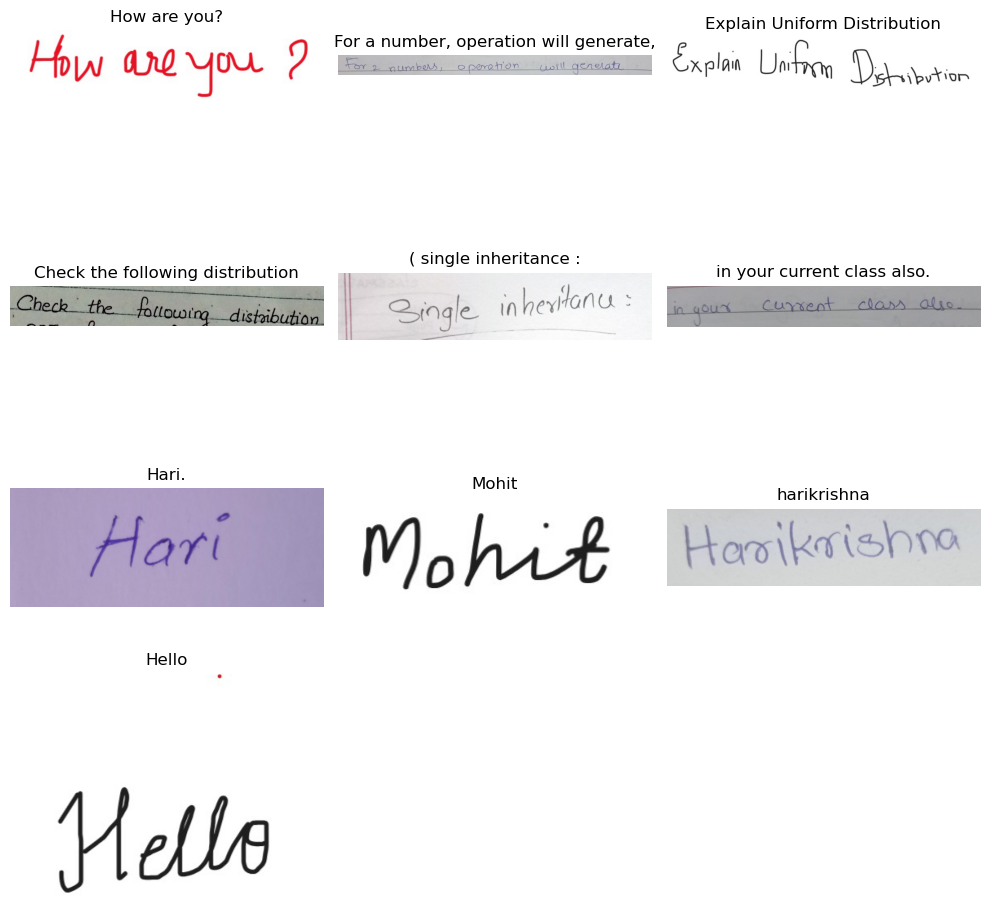

In [22]:
visualize_df(images)